In [91]:
import numpy as np
from matplotlib import rc, animation
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

In [92]:
class x_grid:
    def __init__(self, start = 0, end = 500, grid_points = 1000):
        self.grid_points = grid_points
        self.x_values = np.linspace(start, end, grid_points)
        self.dx = self.x_values[1] - self.x_values[0]

class p_grid:
    def __init__(self, x_grid):
        self.x = x_grid.x_values
        self.dx = x_grid.dx

    def p_values(self):
        res = len(self.x)
        dp = 2 * np.pi / (res * self.dx)
        p = np.concatenate((np.arange(0, res / 2),
                                    np.arange(-res / 2, 0))) * dp
        
        return p

class potential:
    def __init__(self, x_grid):
        self.x = x_grid.x_values

    def V_values(self):
        v = np.zeros_like(self.x)
        v[400:450] = 2

        return v

class kinetic_energy:
    def __init__(self, p_grid):
        self.p = p_grid.p_values()

    def KE_values(self):
        ke = (1/2)*self.p**2

        return ke

class M_method:
    def __init__(self, potential, kinetic_energy):
        self.v = potential.V_values()
        self.ke = kinetic_energy.KE_values()

        self.Psi = np.zeros_like(self.v, dtype=complex) # defining a wave function variable
    
    def hamiltonian(self, vector):
        potntial_matrix = np.diag(self.v)
        KE_matrix = np.diag(self.ke)

        vector = potntial_matrix @ vector

        vector = fft(vector.T) # position basis to momentum basis

        vector = KE_matrix @ vector.T

        vector = ifft(vector.T) # momentum basis to position basis

        return vector.T # return a vector
    
    def initiallize_Psi(self, x_gird):
        x = x_gird.x_values

        # parameters
        sigma = 5
        x0 = 100
        k = 1

        iw = np.ones_like(x, dtype=complex)

        # constant term 
        c = 1/(sigma*np.sqrt(2*np.pi))

        # mid term
        m = np.exp((-1/2)*((x-x0)/sigma)**2)
        
        # last term
        l = np.exp(1j*k*x)

        self.Psi = c * m * l
        
        return None
    
    def matrix_method(self, dt):

        # O(h) = exp(hB/2) * exp(hA) * exp(hB/2)

        real_part = self.Psi.real.reshape(len(self.v), 1) # vector
        imag_part = self.Psi.imag.reshape(len(self.v), 1) # vector

        # after first B term 

        imag_part = (-dt/2)*self.hamiltonian(real_part) + imag_part # vector

        # after middle A term

        real_part = real_part + dt*self.hamiltonian(imag_part) # vector

        # after first B term 

        imag_part = (-dt/2)*self.hamiltonian(real_part) + imag_part # vector

        final_Psi = real_part.real + imag_part.real*1j

        self.Psi = final_Psi

        return None


In [99]:
x = x_grid()
p = p_grid(x)
pot = potential(x)
ke = kinetic_energy(p)

mm = M_method(pot, ke)

mm.initiallize_Psi(x) 

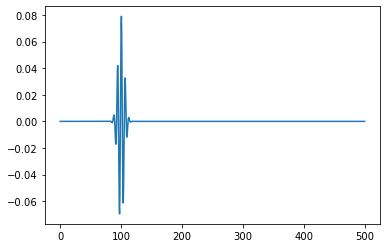

In [102]:
for i in range(100):
    mm.matrix_method(0.01)
    
plt.plot(x.x_values, mm.Psi.real)